### 3.3 Evento di precipitazione giornaliero

Si analizza il fenomeno dell'infiltrazione in una colonna di suolo considerando le precipitazioni sviluppatosi nell'arco temporale compreso tra il 09/09/2014 e il 12/09/2014 prendendo in considerazione i dati pluviometrici della stazione di Borgo Virgilio (MN). 

#### **Definizione della griglia**

**- grid_input_file_name** :  `/data/Grid_input/dati_colonna4_VG.csv`

**- ic_input_file_name** :  `/data/Grid_input/dati_colonna4_IC.csv`

**- parameter_input_file_name** : `/data/Grid_input/Richards_VG.csv`

**- grid_type** : `classical`

**- psi_interp_model** : `linear`

**- T_interp_model** : `linear`

**- output_file_name** : `/data/Grid_NetCDF/colonna4_Grid_1.nc`

---

#### **Creazione della griglia**

In [1]:
import os
import pandas as pd
from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf
import warnings
warnings.filterwarnings('ignore')

project_path = os.path.dirname(os.getcwd())

grid_input_file_name = project_path + "/data/Grid_input/dati_colonna4_VG.csv"
ic_input_file_name = project_path + "/data/Grid_input/dati_colonna4_IC.csv"
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'

dz_min = -9999
dz_max = -9999 
b = -9999 

psi_interp_model = "linear"
T_interp_model = "linear"
water_ponding_0 = -1.5
T_water_ponding_0 = 278.15

output_file_name =  project_path + "/data/Grid_NetCDF/colonna4_Grid_1.nc"
output_title = '''Griglia di calcolo per colonna 4 simulazione 1.
                  '''
output_summary = '''

'''
output_date = ''
output_institution = 'GEOframe'

In [2]:
data_grid = pd.read_csv(grid_input_file_name)
data_ic = pd.read_csv(ic_input_file_name)
data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_summary, output_date, output_institution, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\User\Desktop\OMS_Project_WHETGEO1D_Idrologia_ay_21_22/data/Grid_NetCDF/colonna4_Grid_1.nc


#### **Definizione dei parametri e delle condizioni al contorno**

Dopo aver creato il file netCDF relativo alla griglia, si prosegue con la simulazione utilizzando il simfile WHETGEO1D_sim3.sim, che permette di risolvere il problema di Richards. In tale file sono stati utilizzati i seguenti parametri :

- parametrizzazione della SWRC : **Van Genuchten**
- condizione al contorno sulla superficie : **Coupled**
- condizione al contorno al fondo : **Dirichlet**
- modello che tiene conto della temperatura del suolo: **Ronan1998**
- data d'inizio della simulazione : **09/09/2014 18:00**
- data di fine della simulazione : **12/09/2014 06:00**
- timestep : **60 (ogni ora)**

---

#### **Post-processing**

#### Librerie

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 19,
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58'])
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
plt.rcParams.update(nice_fonts)

#### Visualizzazione del file di output

In [12]:
ds3 = xr.open_dataset(project_path + '/output/sim3_PPG_1_0000.nc')
ds3

<xarray.Dataset>
Dimensions:           (depth: 150, dualDepth: 150, time: 61)
Coordinates:
  * depth             (depth) float64 -1.495 -1.485 -1.475 ... -0.015 -0.005
  * dualDepth         (dualDepth) float64 -1.5 -1.49 -1.48 ... -0.03 -0.02 -0.01
  * time              (time) datetime64[ns] 2014-09-09T18:00:00 ... 2014-09-1...
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D sim3.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\User\Desktop\OMS_Project_WHE...
    path_bottom_boundary_condition:     C:\Users\User\Desktop\OMS_Project_WHE...
    path_grid:                          C:\Users\User\Desktop\OMS_Project_WHE...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

#### Analisi della precipitazione

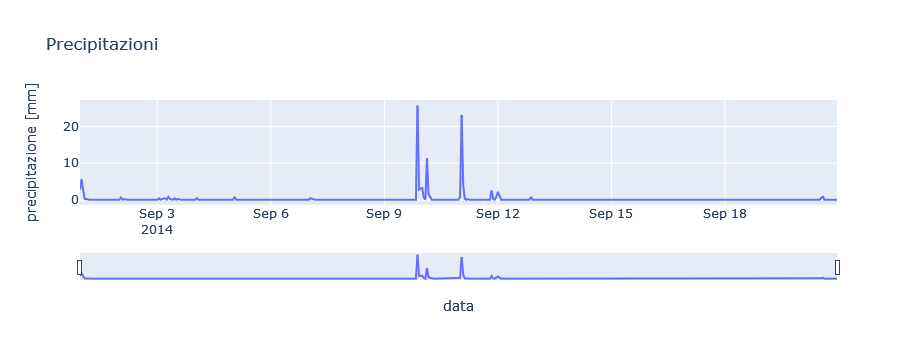

In [13]:
data = pd.read_csv('dati pluviometrici.csv',sep=',',usecols=[1,2])
import plotly.express as px
%matplotlib inline 

fig = px.line(data,x='data', y='precipitazione [mm]',title='Precipitazioni') 
fig.update_xaxes(rangeslider_visible=True)
fig.show()

#### Grafici 2-D

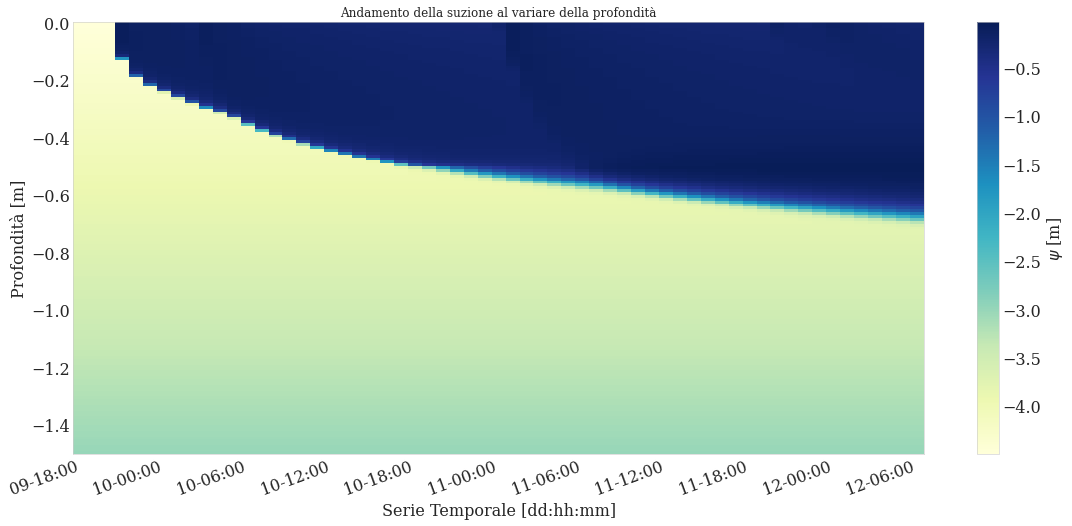

In [14]:
# Variazione della suzione nel tempo 

fig, ax = plt.subplots(1, 1, figsize=(16,12/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds3.psi.values), vmax=np.amax(ds3.psi.values))
ds3.psi.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\psi$ [m]'})

ax.set_title('Andamento della suzione al variare della profondità')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Serie Temporale [dd:hh:mm]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M')) 
ax.xaxis.set_tick_params(rotation=20)

plt.tight_layout()
plt.show()

**Commenti al grafico**

Nel seguente grafico si osserva come l'elevata intensità della precipitazione svilupattasi alle ore 21:00 del 09/09/2014 faccia passare il suolo da una condizione pressochè secca ($\psi$ = 4.5) ad una condizione molto vicina alla saturazione (passaggio dal 
beige al blu).

Si denota inoltre come tutte le precipitazioni con un'intensità rilevante causino un aumento della suzione in prossimità della superficie (colore blu intenso).

Allo scorrere del tempo si nota un approfondimento del fronte di saturazione e, cessata la precipitazione, una diminuzione della lama d'acqua superficiale.

E' importante evidenziare come al fondo sia stata posta una condizione al contorno di dirichlet con una suzione pari a -3.0.

---

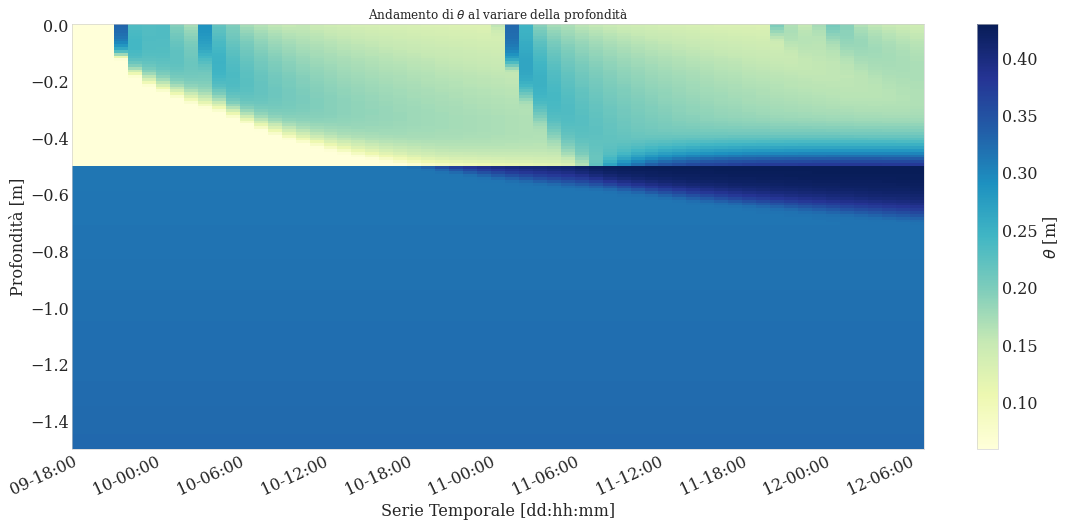

In [15]:
# Variazione del contenuto d'acqua nel tempo 

fig, ax = plt.subplots(1, 1, figsize=(16,12/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds3.theta.values), vmax=np.amax(ds3.theta.values))
ds3.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [m]'})

ax.set_title('Andamento di $\\theta$ al variare della profondità')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Serie Temporale [dd:hh:mm]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
ax.xaxis.set_tick_params(rotation=25)

plt.tight_layout()
plt.show()

**Commenti al grafico**

Nel grafico seguente si osserva che nel momento di precipitazione il contenuto d'acqua negli strati più superficiali aumenta repentinamente fino a raggiungere valori prossimi alla saturazione.

Cessato l'evento di precipitazione si denota una diminuzione del contenuto d'acqua in superficie e un conseguente approfondimento del profilo d'infiltrazione della lama d'acqua evidenziato da una variazione di tonalità del colore originario.

La somma dei vari profili d'infiltrazione, causati dagli eventi di precipitazione, genera in corrispondenza del cambio di strato una zona con contenuto d'acqua prossimo a saturazione (falda in profondità). Tale condizione è favorita dalla presenza di uno strato contraddistinto da una bassa permeabilità.

---

#### Grafici 1-D

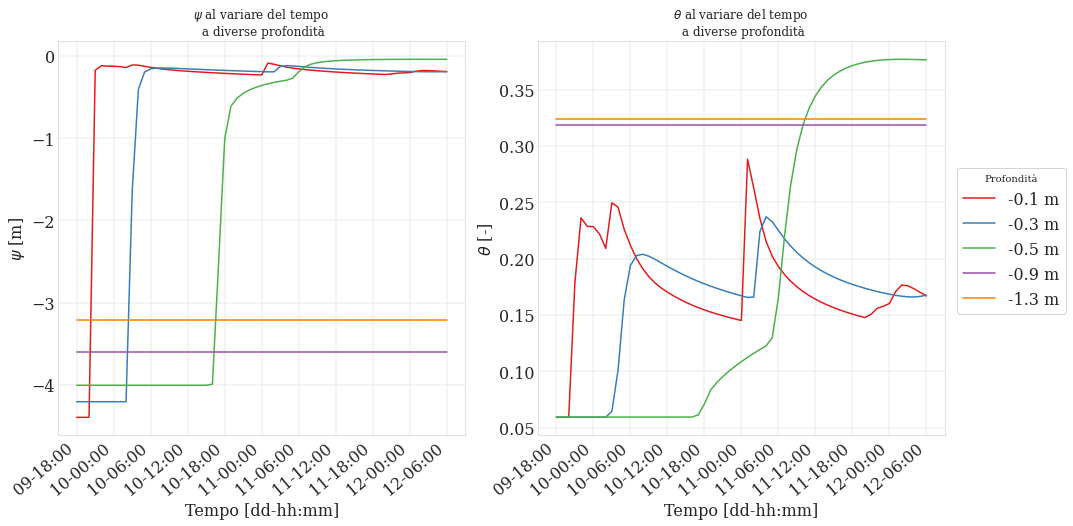

In [16]:
# Profilo della suzione e del contenuto d'acqua a diverse profondità

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12/1.618)) 

ds3.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
ds3.psi.sel(depth=-0.3, method='nearest').plot(ax=ax1, color=colors[1])
ds3.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[2])
ds3.psi.sel(depth=-0.9, method='nearest').plot(ax=ax1, color=colors[3])
ds3.psi.sel(depth=-1.3, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title ('$\psi$ al variare del tempo \n a diverse profondità')
ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Tempo [dd-hh:mm]')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
ax1.xaxis.set_tick_params(rotation=40)

ds3.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds3.theta.sel(depth=-0.3, method='nearest').plot(ax=ax2, label = '-0.3 m', color=colors[1])
ds3.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds3.theta.sel(depth=-0.9, method='nearest').plot(ax=ax2, label = '-0.9 m', color=colors[3])
ds3.theta.sel(depth=-1.3, method='nearest').plot(ax=ax2, label = '-1.3 m', color=colors[4])

ax2.set_title('$\\theta$ al variare del tempo \n a diverse profondità')
ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Tempo [dd-hh:mm]')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
ax2.xaxis.set_tick_params(rotation=40)
ax2.legend(bbox_to_anchor=(1.01,0.7), ncol=1, title='Profondità')

plt.tight_layout()
plt.show()

**Commenti ai grafici**

Nei seguenti grafici si osserva un legame diretto tra precipitazione e parametri del suolo (suzione e  contenuto d'acqua) :
infatti al manifestarsi di un evento di precipitazione si evidenzia un aumento abbastanza repentino di $\psi$ e $\theta$; al contrario, al cessare della precipitazione si ha una diminuzione di tali parametri.

L'aumento di tali parametri fino a valori prossimi alla saturazione non avviene in contemporanea alle diverse profondità dello strato di sabbia a causa delle fisiologiche tempestiche del fenomeno dell'infiltrazione.

In corrispondenza degli strati più profondi (-0.9 e -1.3 m), nelle tempestiche analizzate, i diversi eventi di precipitazione non influenzano tali strati a causa della loro bassa permeabilità. Tale affermazione è evidente in entrambi i grafici.

---

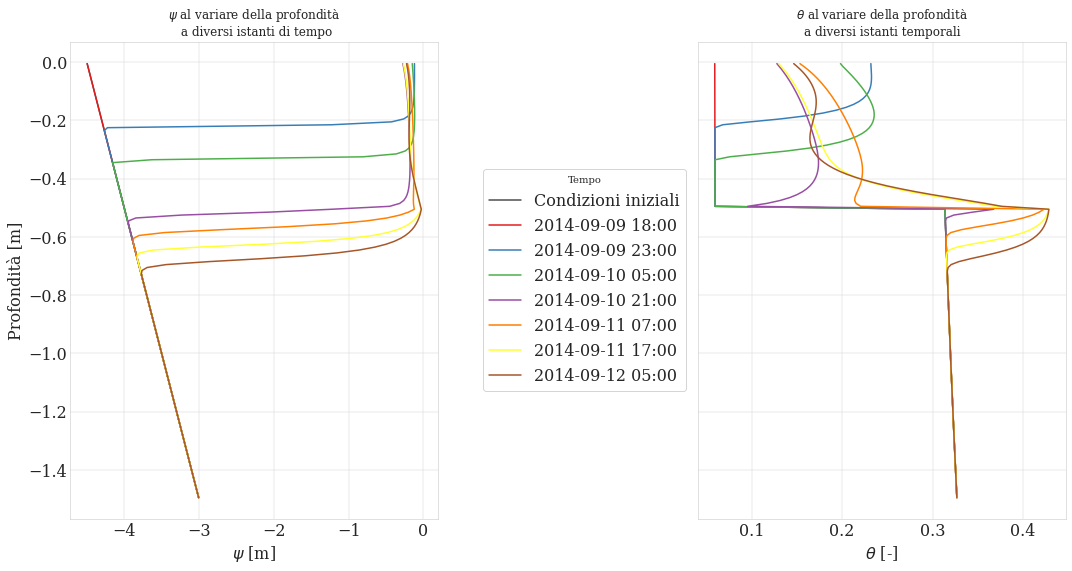

In [9]:
# Profilo della suzione e del contenuto d'acqua a diversi istanti temporali

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(15, 13/1.618)) 

ds3.psiIC.plot(ax=ax1, y='depth', label='Condizioni iniziali', color='0.3')
ds3.psi.sel(time='2014-09-09 18:00').plot(ax=ax1, y='depth', label='2014-09-09 18:00', color=colors[0])
ds3.psi.sel(time='2014-09-09 23:00').plot(ax=ax1, y='depth', label='2014-09-09 23:00', color=colors[1])
ds3.psi.sel(time='2014-09-10 05:00').plot(ax=ax1, y='depth', label='2014-09-10 05:00', color=colors[2])
ds3.psi.sel(time='2014-09-10 21:00').plot(ax=ax1, y='depth', label='2014-09-10 21:00', color=colors[3])
ds3.psi.sel(time='2014-09-11 07:00').plot(ax=ax1, y='depth', label='2014-09-11 07:00', color=colors[4])
ds3.psi.sel(time='2014-09-11 17:00').plot(ax=ax1, y='depth', label='2014-09-11 17:00', color=colors[5])
ds3.psi.sel(time='2014-09-12 05:00').plot(ax=ax1, y='depth', label='2014-09-12 05:00', color=colors[6])

ax1.set_title('$\psi$ al variare della profondità \n a diversi istanti di tempo')
ax1.set_ylabel('Profondità [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Condizioni iniali', color='0.3')
ds3.theta.sel(time='2014-09-09 18:00').plot(ax=ax2, y='depth', label='2014-09-09 18:00', color=colors[0])
ds3.theta.sel(time='2014-09-09 23:00').plot(ax=ax2, y='depth', label='2014-09-09 23:00', color=colors[1])
ds3.theta.sel(time='2014-09-10 05:00').plot(ax=ax2, y='depth', label='2014-09-10 05:00', color=colors[2])
ds3.theta.sel(time='2014-09-10 21:00').plot(ax=ax2, y='depth', label='2014-09-10 21:00', color=colors[3])
ds3.theta.sel(time='2014-09-11 07:00').plot(ax=ax2, y='depth', label='2014-09-11 07:00', color=colors[4])
ds3.theta.sel(time='2014-09-11 17:00').plot(ax=ax2, y='depth', label='2014-09-11 17:00', color=colors[5])
ds3.theta.sel(time='2014-09-12 05:00').plot(ax=ax2, y='depth', label='2014-09-12 05:00', color=colors[6])

ax2.set_title('$\\theta$ al variare della profondità \na diversi istanti temporali')
ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')
ax1.legend(bbox_to_anchor=(1.1,0.75), ncol=1, title='Tempo')

plt.tight_layout()
plt.show()

**Commenti ai grafici**

Nel grafico sovrastante relativo alla suzione si osserva come la condizione iniziale sia idrostica, poichè vi è una relazione diretta tra suzione e profondità (retta).
Inoltre si nota come a diversi istanti temporali successivi il fronte di saturazione si approfondisce (abbassamento delle curve).

Nel grafico relativo al contenuto d'acqua si osserva invece che alla profondità coincidente al cambio di strato si ha un salto di tale parametro.

Nel grafico del contenuto d'acqua si osserva un elevata variabilità di tale parametro nello strato più superficiale a causa delle caratteristiche del suolo e della precitazione (intensità e distribuzione temporale).

Da tali grafici si evidenzia l'assenza di ponding poichè la suzione non presenta valori positivi. L'assenza di tale fenomeno è causata principalmente dall'elevata conducibilità idraulica dello strato di sabbia, che predilige il fenomeno d'infiltrazione a cospetto di quello del deflusso superficiale.

---

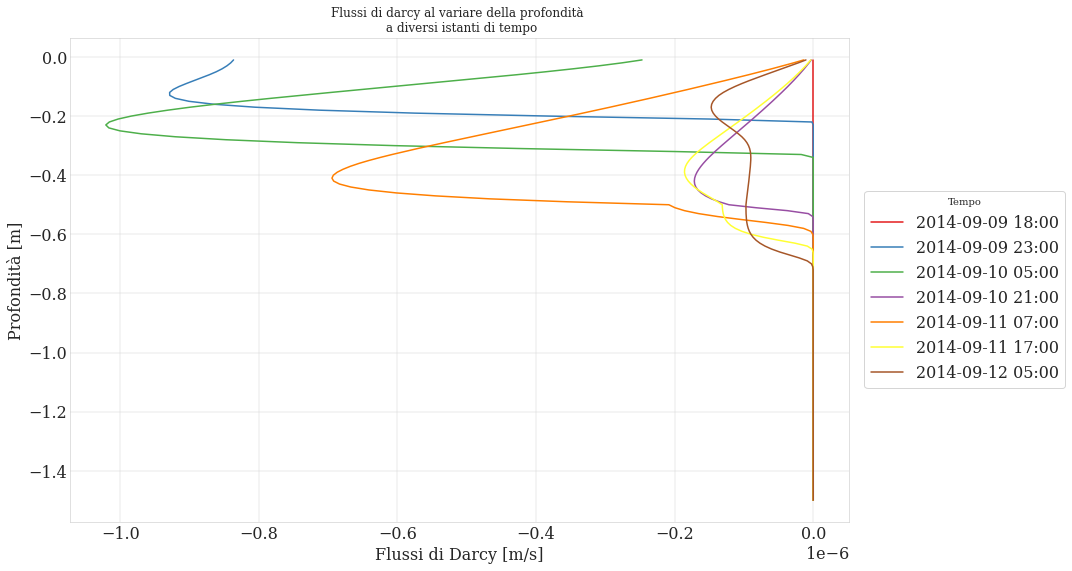

In [10]:
#Profilo dei flussi di darcy al variare della profondità a diversi istanti temporali

fig, ax = plt.subplots(1, 1, sharey='row', figsize=(15, 13/1.618)) 

ds3.darcyVelocity.sel(time='2014-09-09 18:00').plot(ax=ax, y='dualDepth', label='2014-09-09 18:00', color=colors[0])
ds3.darcyVelocity.sel(time='2014-09-09 23:00').plot(ax=ax, y='dualDepth', label='2014-09-09 23:00', color=colors[1])
ds3.darcyVelocity.sel(time='2014-09-10 05:00').plot(ax=ax, y='dualDepth', label='2014-09-10 05:00', color=colors[2])
ds3.darcyVelocity.sel(time='2014-09-10 21:00').plot(ax=ax, y='dualDepth', label='2014-09-10 21:00', color=colors[3])
ds3.darcyVelocity.sel(time='2014-09-11 07:00').plot(ax=ax, y='dualDepth', label='2014-09-11 07:00', color=colors[4])
ds3.darcyVelocity.sel(time='2014-09-11 17:00').plot(ax=ax, y='dualDepth', label='2014-09-11 17:00', color=colors[5])
ds3.darcyVelocity.sel(time='2014-09-12 05:00').plot(ax=ax, y='dualDepth', label='2014-09-12 05:00', color=colors[6])

ax.set_title('Flussi di darcy al variare della profondità \n a diversi istanti di tempo')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Flussi di Darcy [m/s]')
ax.legend(bbox_to_anchor=(1.01,0.7), ncol=1, title="Tempo")

plt.tight_layout()
plt.show()

**Commenti al grafico**

Nel grafico seguente si osserva un legame tra i flussi di Darcy e gli eventi di precipitazione : la precipitazione causa un aumento del fenomeno d'infiltrazione visibile nel grafico con un aumento della variabilità dei flussi.

---